In [212]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [213]:
warnings.filterwarnings('ignore')

In [214]:
data = pd.read_csv("/content/COALINDIA.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


In [215]:
data.drop(['Date'], axis=1, inplace=True)

In [216]:
print(data.head())
print(data.shape)
print(data.columns)

      Symbol Series  Prev Close    Open   High     Low   Last   Close    VWAP  \
0  COALINDIA     EQ      245.00  291.00  344.9  291.00  342.0  342.55  327.29   
1  COALINDIA     EQ      342.55  343.00  356.5  343.00  348.3  349.85  349.78   
2  COALINDIA     EQ      349.85  351.80  355.9  329.50  331.4  330.75  335.19   
3  COALINDIA     EQ      330.75  330.15  333.4  325.00  325.4  326.05  327.75   
4  COALINDIA     EQ      326.05  325.40  327.8  320.05  321.3  322.80  323.78   

      Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  479716245  1.570040e+16     NaN           187584905       0.3910  
1   31927173  1.116747e+15     NaN            10894509       0.3412  
2   46932779  1.573118e+15     NaN            16651623       0.3548  
3   23741956  7.781383e+14     NaN            12977359       0.5466  
4   21057129  6.817982e+14     NaN             6280335       0.2983  
(2598, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Cl

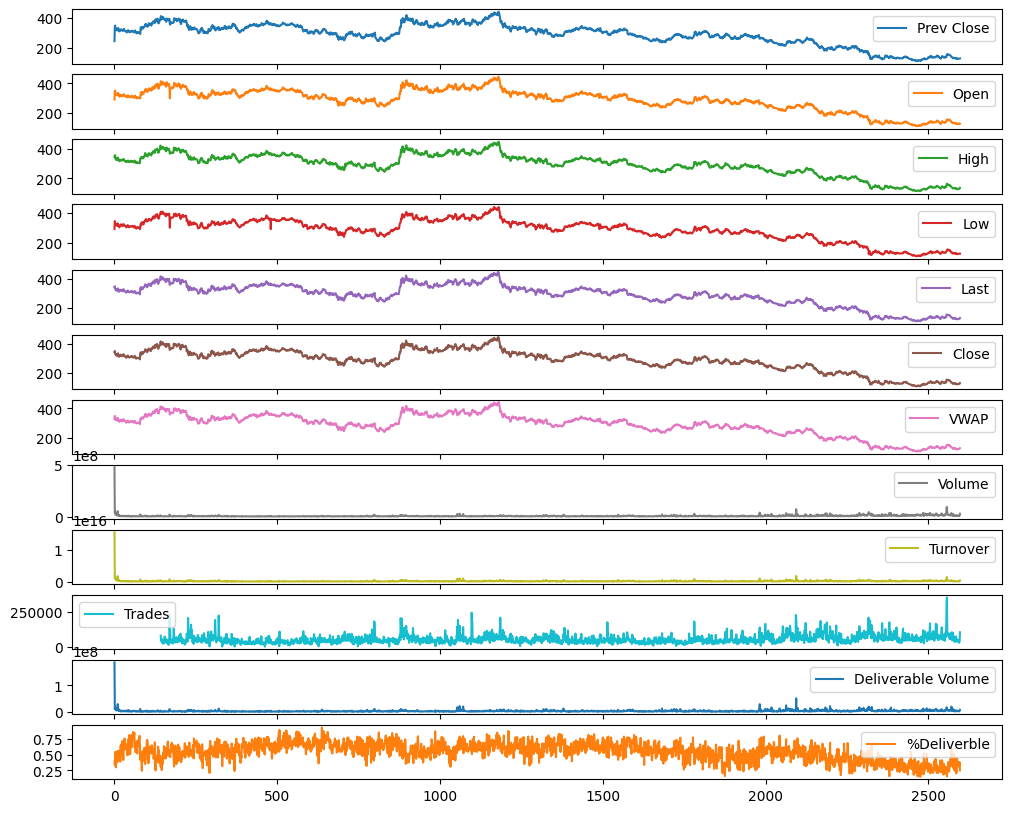

Symbol                   1
Series                   1
Prev Close            1968
Open                  1639
High                  1833
Low                   1850
Last                  1874
Close                 1968
VWAP                  2442
Volume                2598
Turnover              2598
Trades                2421
Deliverable Volume    2598
%Deliverble           2051
dtype: int64

In [217]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [218]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


         Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     COALINDIA     EQ      245.00  291.00  344.90  291.00  342.00  342.55   
1     COALINDIA     EQ      342.55  343.00  356.50  343.00  348.30  349.85   
2     COALINDIA     EQ      349.85  351.80  355.90  329.50  331.40  330.75   
3     COALINDIA     EQ      330.75  330.15  333.40  325.00  325.40  326.05   
4     COALINDIA     EQ      326.05  325.40  327.80  320.05  321.30  322.80   
...         ...    ...         ...     ...     ...     ...     ...     ...   
2593  COALINDIA     EQ      126.15  127.75  128.00  126.50  127.00  126.95   
2594  COALINDIA     EQ      126.95  127.00  127.90  126.60  127.55  127.50   
2595  COALINDIA     EQ      127.50  128.00  129.45  127.50  128.50  128.50   
2596  COALINDIA     EQ      128.50  129.75  130.05  127.65  127.95  128.05   
2597  COALINDIA     EQ      128.05  127.40  134.60  127.00  133.00  133.05   

        VWAP     Volume      Turnover    Trades  Deliverable Vo

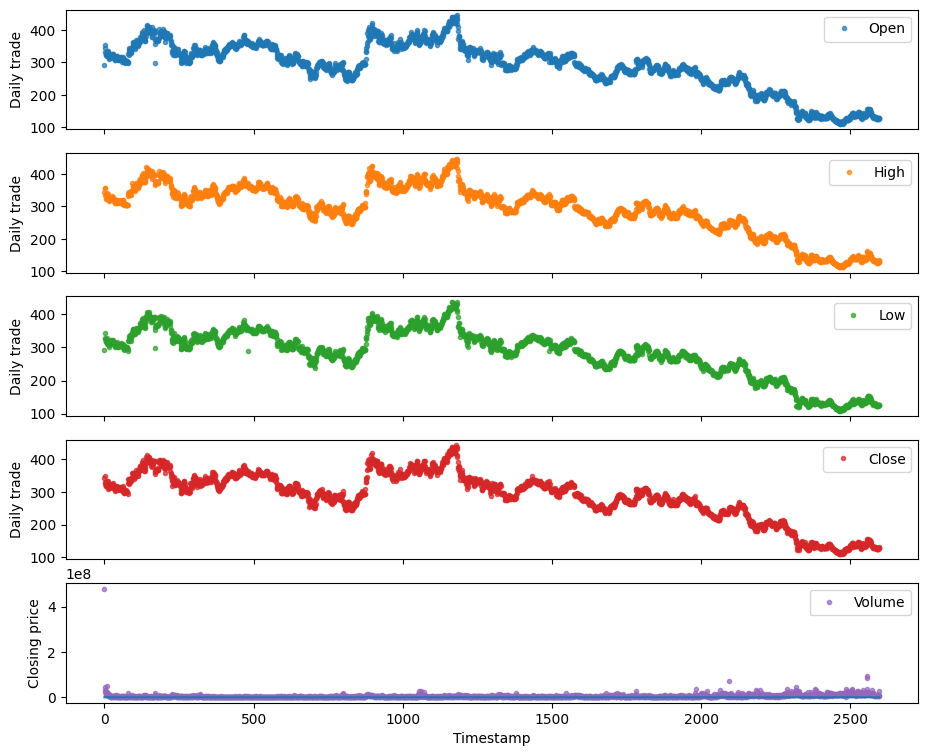

In [219]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [220]:
data.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                142
Deliverable Volume      0
%Deliverble             0
dtype: int64

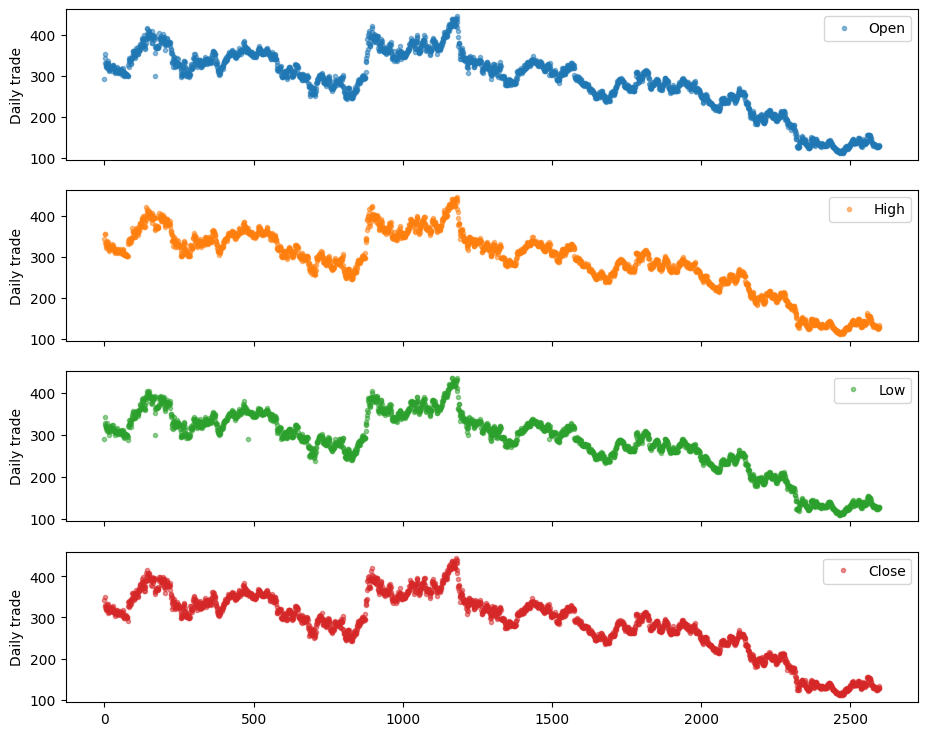

In [221]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

         Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     COALINDIA     EQ      245.00  291.00  344.90  291.00  342.00  342.55   
1     COALINDIA     EQ      342.55  343.00  356.50  343.00  348.30  349.85   
2     COALINDIA     EQ      349.85  351.80  355.90  329.50  331.40  330.75   
3     COALINDIA     EQ      330.75  330.15  333.40  325.00  325.40  326.05   
4     COALINDIA     EQ      326.05  325.40  327.80  320.05  321.30  322.80   
...         ...    ...         ...     ...     ...     ...     ...     ...   
2593  COALINDIA     EQ      126.15  127.75  128.00  126.50  127.00  126.95   
2594  COALINDIA     EQ      126.95  127.00  127.90  126.60  127.55  127.50   
2595  COALINDIA     EQ      127.50  128.00  129.45  127.50  128.50  128.50   
2596  COALINDIA     EQ      128.50  129.75  130.05  127.65  127.95  128.05   
2597  COALINDIA     EQ      128.05  127.40  134.60  127.00  133.00  133.05   

        VWAP     Volume      Turnover    Trades  Deliverable Vo

,count,mean,std,min,25%,50%,75%,max
Prev Close,2598.0,2.879966e+02,7.408693e+01,1.105500e+02,2.540875e+02,2.999500e+02,3.416375e+02,4.434000e+02
Open,2598.0,2.882340e+02,7.413277e+01,1.108500e+02,2.547375e+02,3.001000e+02,3.412000e+02,4.450000e+02
High,2598.0,2.918917e+02,7.506422e+01,1.124500e+02,2.570125e+02,3.039250e+02,3.454625e+02,4.471000e+02
Low,2598.0,2.842409e+02,7.323846e+01,1.095500e+02,2.511875e+02,2.959500e+02,3.361375e+02,4.370000e+02
Last,2598.0,2.879509e+02,7.409866e+01,1.106000e+02,2.543250e+02,3.000000e+02,3.418250e+02,4.439000e+02
Close,2598.0,2.879535e+02,7.414448e+01,1.105500e+02,2.540875e+02,2.999500e+02,3.416375e+02,4.434000e+02
VWAP,2598.0,2.880957e+02,7.418102e+01,1.105000e+02,2.543125e+02,3.002900e+02,3.406675e+02,4.419300e+02
Volume,2598.0,5.617118e+06,1.105497e+07,2.143700e+04,2.236566e+06,3.471441e+06,6.321588e+06,4.797162e+08
Turnover,2598.0,1.405398e+14,3.292618e+14,7.734786e+11,6.921541e+13,1.032340e+14,1.596711e+14,1.570040e+16
Trades,2456.0,5.349384e+04,3.050837e+04,6.120000e+02,3.374875e+04,4.675500e+04,6.410650e+04,3.512150e+05


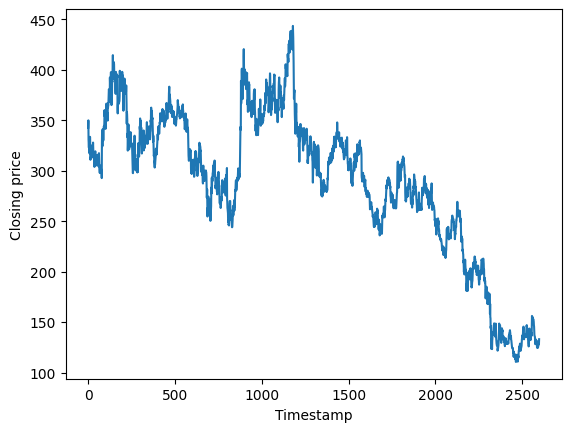

In [222]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [223]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1996
500


In [224]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
32/32 [==============================] - 4s 25ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0825 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0528
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0372 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0290
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0247
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 9.8788e-04 - mse: 9.8788e-04 - mae: 0.0239 - val_loss: 9.1711e-04 - val_mse: 9.1711e-04 - val_mae: 0.0229
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 8.7233e-04 - mse: 8.7233e-04 - mae: 0.0224 - val_loss: 8.2855e-04 - val_mse: 8.2855e-04 - val_mae: 0.0217
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.8965e-04 - mse: 7.8965e-04 - mae: 0.0212 - val_loss: 7.7433e-04 - val_mse: 7.

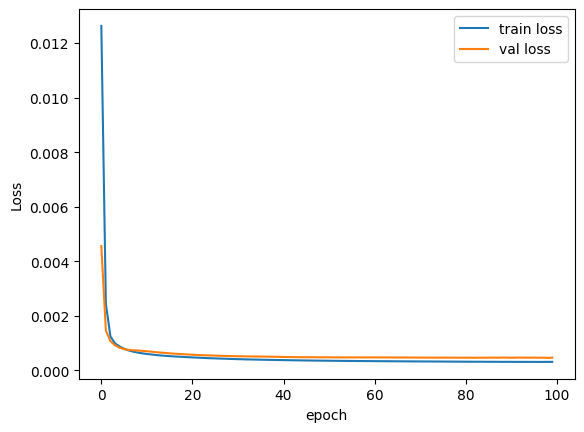

In [225]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

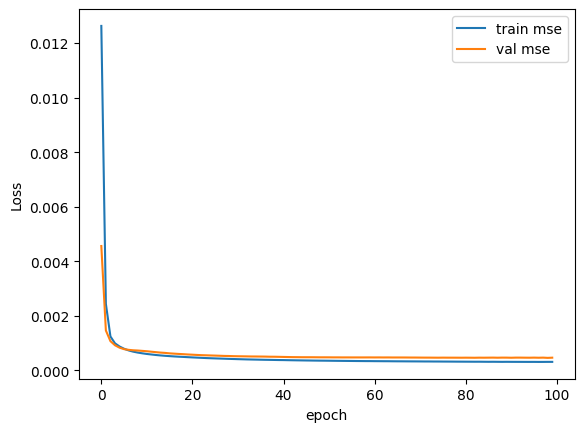

In [226]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

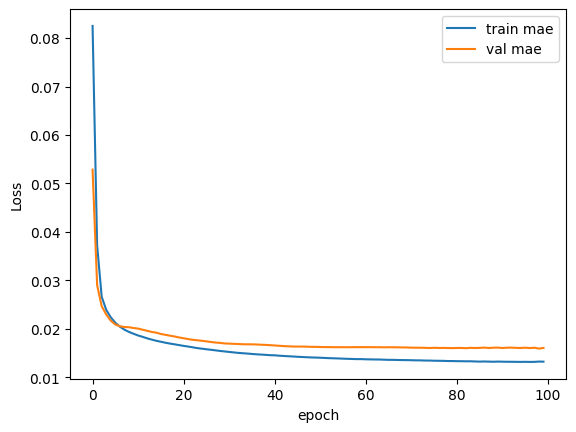

In [227]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_17 (LSTM)              (None, 32)                6272      
                                                                 
 dense_40 (Dense)            (None, 64)                2112      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 activation_24 (Activation)  (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 activation_25 (Activation)  (None, 64)               

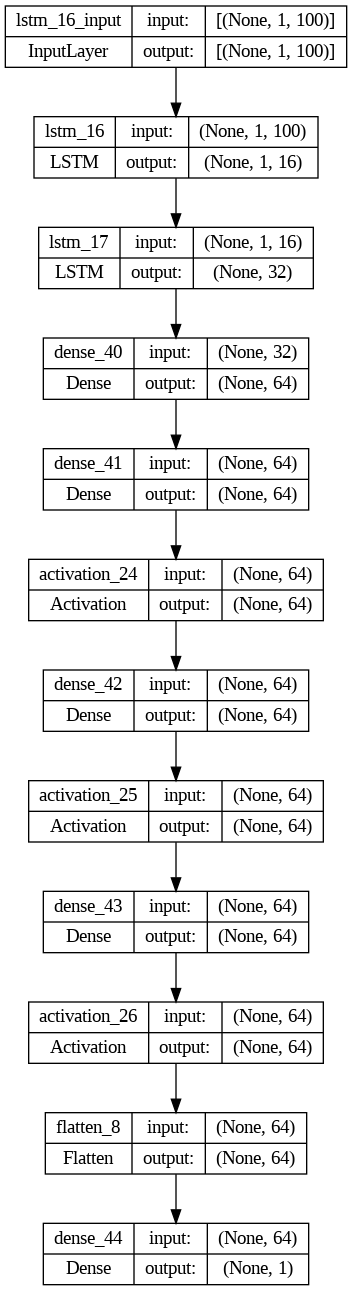

In [228]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [229]:
model.evaluate(test_X, test_Y)

16/16 [==============================] - 0s 2ms/step - loss: 4.6201e-04 - mse: 4.6201e-04 - mae: 0.0160


[0.0004620063700713217, 0.0004620063700713217, 0.016044139862060547]

In [230]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.980537
R2 Score: 0.980217
Max Error: 0.079939


16/16 [==============================] - 0s 2ms/step


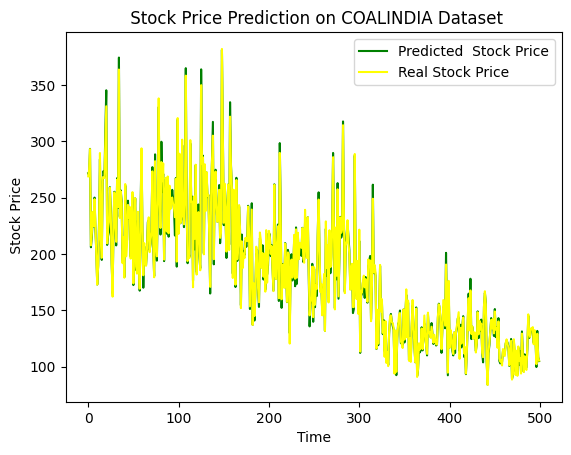

In [231]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on COALINDIA Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

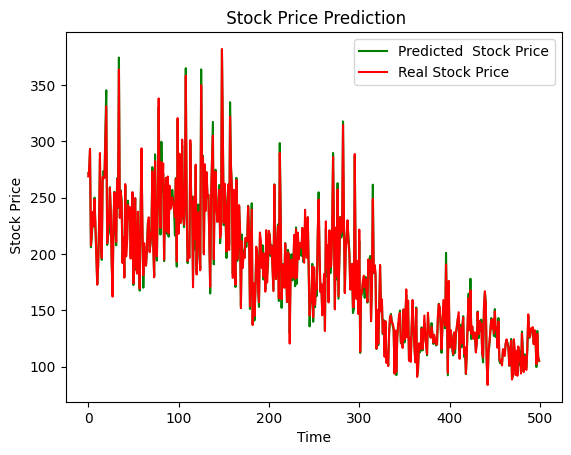

In [232]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [233]:
predicted

array([[271.55023 ],
       [269.49887 ],
       [293.17322 ],
       [205.8598  ],
       [214.7969  ],
       [231.91832 ],
       [224.3541  ],
       [249.92113 ],
       [221.69868 ],
       [201.17557 ],
       [172.80878 ],
       [189.27048 ],
       [227.55756 ],
       [284.0149  ],
       [208.1745  ],
       [194.62633 ],
       [264.29065 ],
       [273.5694  ],
       [268.21167 ],
       [309.5491  ],
       [345.1599  ],
       [207.92023 ],
       [215.99033 ],
       [219.18341 ],
       [259.1784  ],
       [238.10698 ],
       [191.3831  ],
       [164.81544 ],
       [226.11496 ],
       [255.09071 ],
       [222.77615 ],
       [207.50797 ],
       [267.19254 ],
       [240.7861  ],
       [374.19452 ],
       [232.97046 ],
       [256.35052 ],
       [246.7582  ],
       [193.69475 ],
       [207.95355 ],
       [179.3776  ],
       [260.57928 ],
       [212.523   ],
       [212.12502 ],
       [247.18663 ],
       [231.06447 ],
       [239.34268 ],
       [197.4

In [234]:
test_label

array([[268.78735146],
       [274.33130979],
       [292.98867837],
       [207.61299729],
       [218.38081181],
       [237.2463114 ],
       [224.51553166],
       [248.57348082],
       [227.0130039 ],
       [197.68658085],
       [172.71060872],
       [189.375     ],
       [220.54555315],
       [289.48399247],
       [213.89619054],
       [196.45586131],
       [268.02961276],
       [267.23626667],
       [267.25596417],
       [299.81443602],
       [330.98287671],
       [209.35272793],
       [222.61980789],
       [229.14461326],
       [258.58825536],
       [235.49559714],
       [192.58398183],
       [162.02344947],
       [229.75945612],
       [254.51500092],
       [226.10192837],
       [210.67716795],
       [265.77958688],
       [241.63173548],
       [363.56533062],
       [231.80256494],
       [255.3918385 ],
       [244.66629637],
       [191.77957649],
       [214.84586207],
       [178.88435019],
       [261.93772295],
       [197.77079149],
       [209

In [235]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      268.787351       271.550232
1      274.331310       269.498871
2      292.988678       293.173218
3      207.612997       205.859802
4      218.380812       214.796906
..            ...              ...
495    125.512885       125.679863
496    102.134656        99.564316
497    129.080381       131.609222
498    107.651633       108.276192
499    105.257161       104.844299

[500 rows x 2 columns]


In [236]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 268.7873514569429  | 271.55023193359375 |
|  1  | 274.3313097866078  | 269.4988708496094  |
|  2  | 292.98867837338264 | 293.1732177734375  |
|  3  | 207.61299729223077 | 205.85980224609375 |
|  4  | 218.3808118081181  | 214.79690551757812 |
|  5  | 237.2463114042701  | 231.91831970214844 |
|  6  | 224.51553166069297 | 224.35409545898438 |
|  7  |  248.573480821721  | 249.92112731933594 |
|  8  | 227.01300390117035 | 221.6986846923828  |
|  9  | 197.68658085277553 | 201.17556762695312 |
| 10  | 172.71060871743487 | 172.80877685546875 |
| 11  |      189.375       | 189.27047729492188 |
| 12  | 220.5455531453362  | 227.55755615234375 |
| 13  | 289.4839924670433  |  284.014892578125  |
| 14  | 213.89619053928715 | 208.17449951171875 |
| 15  | 196.45586130985137 | 194.62632751464844 |
| 16  | 268.02961275626427 | 264.2906494140625  |


In [237]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_17 (LSTM)              (None, 32)                6272      
                                                                 
 dense_40 (Dense)            (None, 64)                2112      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 activation_24 (Activation)  (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 activation_25 (Activation)  (None, 64)               

In [238]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))